In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.metrics import r2_score
import warnings

In [3]:
# Load the Data
rawD = pd.read_excel('parameters.xlsx',sheet_name="data")
V0 = rawD['V'].values
tp = rawD['t'].values
Tmax = rawD['exp Tmax'].values
Tavg = rawD['exp Tavg'].values
kh = rawD['kh'].values
ht = rawD['ht'].values

display(rawD)

,t,V,exp Tmax,exp Tavg,kh,ht
0,0.01,35,954.4,767.4,0.705323,0.041978
1,0.01,40,1140.3,792.7,0.502800,0.032739
2,0.01,45,1324.3,820.8,0.439332,0.028612
3,0.01,50,1480.1,876.0,0.432066,0.021869
4,0.01,55,1627.5,908.8,0.437141,0.021591
5,0.01,60,1827.8,982.6,0.426451,0.018061
6,0.01,65,1947.8,998.4,0.450827,0.019999
7,0.01,70,2025.6,1003.2,0.491053,0.022837
8,0.02,30,1018.5,769.6,1.003068,0.075498
9,0.02,35,1235.8,821.1,0.790658,0.044545


[-3.57402387e+00  5.52525431e-01  1.51906371e-01  2.62083370e-02
 -1.19143131e-02  2.34267797e-03  1.48637088e+01  3.08368906e-01]


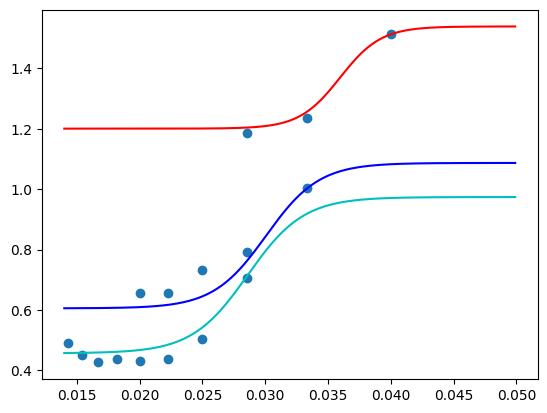

In [4]:
# kh regression
Vr = 1/V0

def sig_kh(x,p,tpv):
    a0 = p[0]*tpv + p[1]
    a1 = p[2]*tpv + p[3]
    a2 = p[4]*tpv + p[5]
    a3 = p[6]*tpv + p[7]
    y= a0/(1+1.48*np.exp(-(x-a1)/a2))+a3
    return y

def lsq(p):
    error = 0
    for i in range(len(Vr)):
        y = sig_kh(Vr[i],p,tp[i])
        error += (kh[i]-y)**2
    return error

x0 = [-3.57402387e+00,  5.52525431e-01,  1.51906371e-01,  2.62083313e-02, -1.19143132e-02,  2.34268186e-03,  1.48637088e+01,  3.08368906e-01]

res = minimize(lsq,x0)

x = res.x
print(x)
xplt = np.arange(0.014,0.05,0.0001)
yplt1 = sig_kh(xplt,x,0.01)
yplt2 = sig_kh(xplt,x,0.02)
yplt3 = sig_kh(xplt,x,0.06)
plt.scatter(Vr,kh)
plt.plot(xplt,yplt1,'c-')
plt.plot(xplt,yplt2,'b-')
plt.plot(xplt,yplt3,'r-')
plt.show()

[ 0.15544343  0.04403907 -0.00157864  0.00443508  0.5941463   0.01316064]


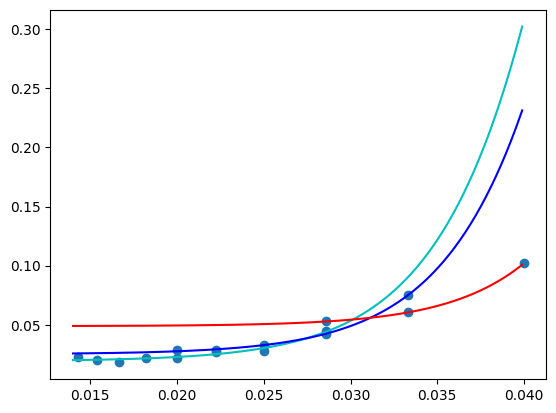

In [5]:
# ht regression
Vr = 1/V0

def sig_ht(x,p,tpv):
    a0 = p[0]*tpv + p[1]
    a1 = p[2]*tpv + p[3]
    a2 = p[4]*tpv + p[5]
    y= 2.139/(1+1.807*np.exp(-(x-a0)/a1))+a2
    return y

def lsq(p):
    error = 0
    for i in range(len(Vr)):
        y = sig_ht(Vr[i],p,tp[i])
        error += (ht[i]-y)**2
    return error

x0 = [ 0.15544343,  0.04403907, -0.00157864,  0.00443508,  0.5941463,   0.01316064]

res = minimize(lsq,x0)

x = res.x
print(x)
xplt = np.arange(0.014,0.04,0.0001)
yplt1 = sig_ht(xplt,x,0.01)
yplt2 = sig_ht(xplt,x,0.02)
yplt3 = sig_ht(xplt,x,0.06)
plt.scatter(Vr,ht)
plt.plot(xplt,yplt1,'c-')
plt.plot(xplt,yplt2,'b-')
plt.plot(xplt,yplt3,'r-')
plt.show()

In [6]:
# Time
dt = 1e-4
t = np.arange(dt,1.11+dt,dt)

# Power Function
def power(V0,tp):
    # Power funciton
    wv = np.zeros(len(t))
    a = 0.003
    b = tp
    c = 1e-5
    d = 1.1

    for i in range(len(t)):
        if t[i] < 0.01:
            wv[i] = c
        elif (0.01 <= t[i]) & (t[i] < (0.01+a/2)):
            wv[i] = c + 2/a**2*(t[i]-0.01)**2
        elif (0.01+a/2 <= t[i]) & (t[i] < (0.01+a)):
            wv[i] = c + -2/a**2*(t[i]-0.01-a)**2+1
        elif ((0.01+a) <= t[i]) & (t[i] < (0.01+b-a)):
            wv[i] = c + 1
        elif ((0.01+b-a) <= t[i]) & (t[i] < (0.01+b-a/2)):
            wv[i] =c + -2/a**2*(t[i]-0.01-b+a)**2+1
        elif ((0.01+b-a/2) <= t[i]) & (t[i] < (0.01+b)):
            wv[i] =c + 2/a**2*(t[i]-0.01-b)**2
        else:
            wv[i] = c

    V = V0 * wv
    return V**2/4.418081

In [7]:
# Heat Balance Function
def heat_balance_cal(V0,tp):
    T0 = 730
    T = np.zeros(len(t))+T0
    P = power(V0,tp)
    Q = np.zeros(len(t))
    Vr = 1/V0
    p_kh = [-3.57402387e+00,  5.52525431e-01,  1.51906371e-01,  2.62083313e-02, -1.19143132e-02,  2.34268186e-03,  1.48637088e+01,  3.08368906e-01]
    p_ht = [ 0.15544343,  0.04403907, -0.00157864,  0.00443508,  0.5941463,   0.01316064]

    kh = sig_kh(Vr,p_kh,tp)
    ht = sig_ht(Vr,p_ht,tp)

    for i in range(len(Q)-1):
        Cp = kh*0.010783 #J/K       
        dQ = (T[i]-T0)
        if dQ <= 0:
            dQ = 1e-6
        Q = P[i]*(dt) - ht*dQ**(1)*(dt)
        T[i+1] = Q/Cp + T[i]

    return T

In [8]:
# Heat Balance Function
def heat_balance_exp(V0,tp,kh,ht):
    T0 = 730
    T = np.zeros(len(t))+T0
    P = power(V0,tp)
    Q = np.zeros(len(t))

    for i in range(len(Q)-1):
        Cp = kh*0.010783 #J/K       
        dQ = (T[i]-T0)
        if dQ <= 0:
            dQ = 1e-6
        Q = P[i]*(dt) - ht*dQ**(1)*(dt)
        T[i+1] = Q/Cp + T[i]

    return T

In [9]:
T_cal = list(range(len(V0)))
T_exp = list(range(len(V0)))

for i in range(len(V0)):
    T_cal[i] = heat_balance_cal(V0[i],tp[i])
    T_exp[i] = heat_balance_exp(V0[i],tp[i],kh[i],ht[i])

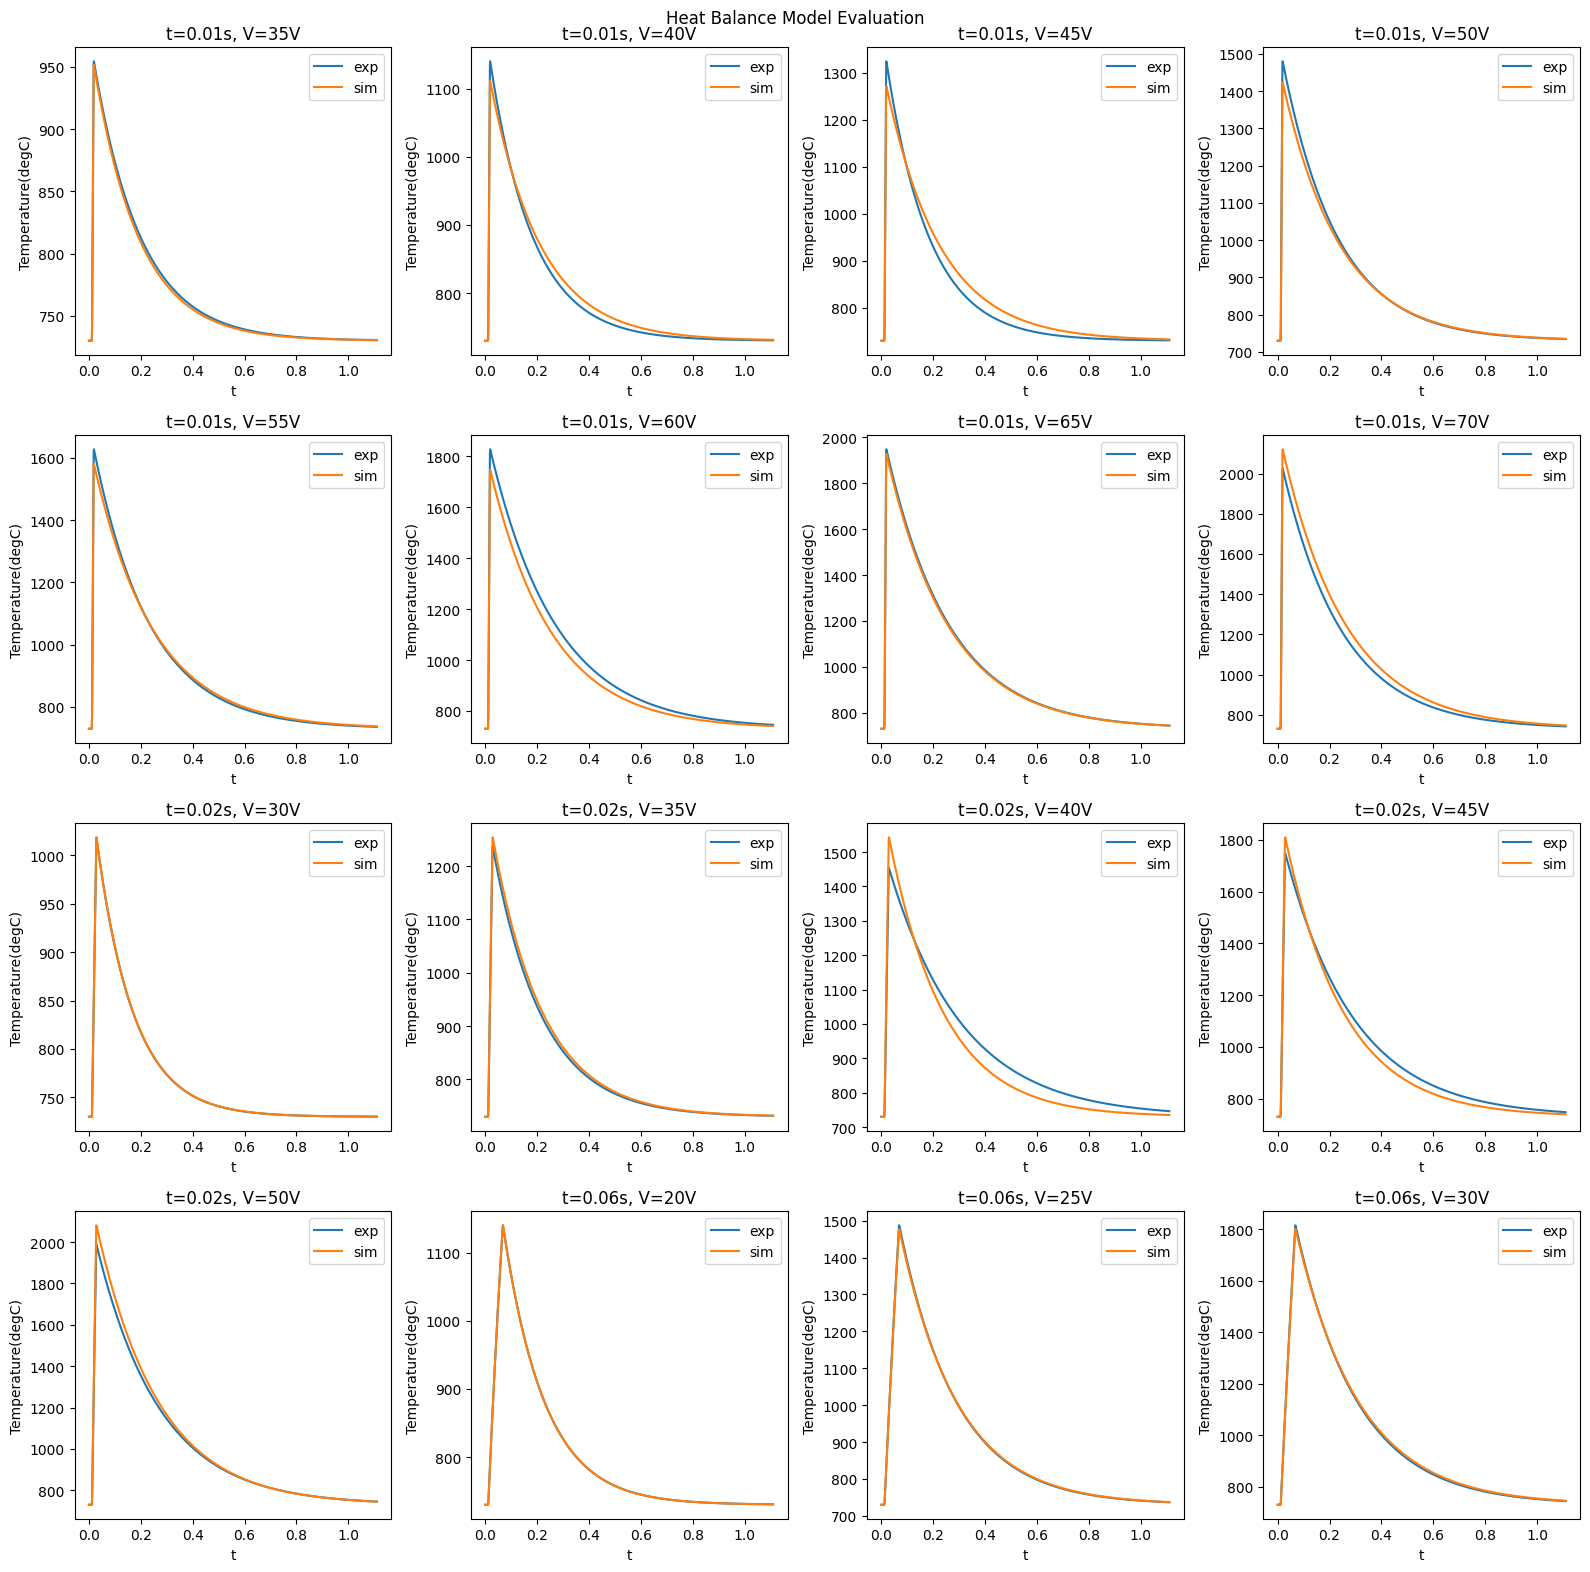

In [10]:
fig, axes = plt.subplots(4,4, figsize=(16,16))

axes[0,0].plot(t,T_exp[0], label ='exp')
axes[0,0].plot(t,T_cal[0], label ='sim')
axes[0,1].plot(t,T_exp[1], label ='exp')
axes[0,1].plot(t,T_cal[1], label ='sim')
axes[0,2].plot(t,T_exp[2], label ='exp')
axes[0,2].plot(t,T_cal[2], label ='sim')
axes[0,3].plot(t,T_exp[3], label ='exp')
axes[0,3].plot(t,T_cal[3], label ='sim')
axes[1,0].plot(t,T_exp[4], label ='exp')
axes[1,0].plot(t,T_cal[4], label ='sim')
axes[1,1].plot(t,T_exp[5], label ='exp')
axes[1,1].plot(t,T_cal[5], label ='sim')
axes[1,2].plot(t,T_exp[6], label ='exp')
axes[1,2].plot(t,T_cal[6], label ='sim')
axes[1,3].plot(t,T_exp[7], label ='exp')
axes[1,3].plot(t,T_cal[7], label ='sim')
axes[2,0].plot(t,T_exp[8], label ='exp')
axes[2,0].plot(t,T_cal[8], label ='sim')
axes[2,1].plot(t,T_exp[9], label ='exp')
axes[2,1].plot(t,T_cal[9], label ='sim')
axes[2,2].plot(t,T_exp[10], label ='exp')
axes[2,2].plot(t,T_cal[10], label ='sim')
axes[2,3].plot(t,T_exp[11], label ='exp')
axes[2,3].plot(t,T_cal[11], label ='sim')
axes[3,0].plot(t,T_exp[12], label ='exp')
axes[3,0].plot(t,T_cal[12], label ='sim')
axes[3,1].plot(t,T_exp[13], label ='exp')
axes[3,1].plot(t,T_cal[13], label ='sim')
axes[3,2].plot(t,T_exp[14], label ='exp')
axes[3,2].plot(t,T_cal[14], label ='sim')
axes[3,3].plot(t,T_exp[15], label ='exp')
axes[3,3].plot(t,T_cal[15], label ='sim')

axes[0,0].set_xlabel('t')
axes[0,0].set_ylabel('Temperature(degC)')
axes[0,1].set_xlabel('t')
axes[0,1].set_ylabel('Temperature(degC)')
axes[0,2].set_xlabel('t')
axes[0,2].set_ylabel('Temperature(degC)')
axes[0,3].set_xlabel('t')
axes[0,3].set_ylabel('Temperature(degC)')
axes[1,0].set_xlabel('t')
axes[1,0].set_ylabel('Temperature(degC)')
axes[1,1].set_xlabel('t')
axes[1,1].set_ylabel('Temperature(degC)')
axes[1,2].set_xlabel('t')
axes[1,2].set_ylabel('Temperature(degC)')
axes[1,3].set_xlabel('t')
axes[1,3].set_ylabel('Temperature(degC)')
axes[2,0].set_xlabel('t')
axes[2,0].set_ylabel('Temperature(degC)')
axes[2,1].set_xlabel('t')
axes[2,1].set_ylabel('Temperature(degC)')
axes[2,2].set_xlabel('t')
axes[2,2].set_ylabel('Temperature(degC)')
axes[2,3].set_xlabel('t')
axes[2,3].set_ylabel('Temperature(degC)')
axes[3,0].set_xlabel('t')
axes[3,0].set_ylabel('Temperature(degC)')
axes[3,1].set_xlabel('t')
axes[3,1].set_ylabel('Temperature(degC)')
axes[3,2].set_xlabel('t')
axes[3,2].set_ylabel('Temperature(degC)')
axes[3,3].set_xlabel('t')
axes[3,3].set_ylabel('Temperature(degC)')

axes[0,0].legend()
axes[0,1].legend()
axes[0,2].legend()
axes[0,3].legend()
axes[1,0].legend()
axes[1,1].legend()
axes[1,2].legend()
axes[1,3].legend()
axes[2,0].legend()
axes[2,1].legend()
axes[2,2].legend()
axes[2,3].legend()
axes[3,0].legend()
axes[3,1].legend()
axes[3,2].legend()
axes[3,3].legend()

fig.suptitle('Heat Balance Model Evaluation')
axes[0,0].set_title('t=0.01s, V=35V')
axes[0,1].set_title('t=0.01s, V=40V')
axes[0,2].set_title('t=0.01s, V=45V')
axes[0,3].set_title('t=0.01s, V=50V')
axes[1,0].set_title('t=0.01s, V=55V')
axes[1,1].set_title('t=0.01s, V=60V')
axes[1,2].set_title('t=0.01s, V=65V')
axes[1,3].set_title('t=0.01s, V=70V')
axes[2,0].set_title('t=0.02s, V=30V')
axes[2,1].set_title('t=0.02s, V=35V')
axes[2,2].set_title('t=0.02s, V=40V')
axes[2,3].set_title('t=0.02s, V=45V')
axes[3,0].set_title('t=0.02s, V=50V')
axes[3,1].set_title('t=0.06s, V=20V')
axes[3,2].set_title('t=0.06s, V=25V')
axes[3,3].set_title('t=0.06s, V=30V')

plt.tight_layout()
plt.show()

In [15]:
for i in range(len(V0)):
    print(np.average(T_cal[i]))

765.7343784142162
797.7131089590268
833.2543336113515
870.3964894667245
909.1931847065005
950.0982764614498
993.4953583208136
1039.6465236409817
769.750269938273
825.8416859262668
891.3843624315123
958.9101669717231
1028.7147551684009
800.3306173756497
899.4458549784268
993.3275275565984
